# Group 25 Final Report

In [1]:
library(tidyverse)
library(dplyr)
library(GGally)
library(cowplot)
library(car)
library(rsample)
library(broom)
library(pROC)
library(yardstick)
library(glmnet)
library(repr)
library(gridExtra)
library(caret)
library(mltools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are ma

## Introduction

Employee resignation is a significant concern for organizations across industries. This is because when employees decide to quit a company, it can disrupt productivity leading to financial losses (Batt, R., & Colvin, A. J. S., 2011, p.700). Understanding whether employees will leave is crucial for businesses aiming to retain top talent. The reasons behind resignations are varied and can range from personal factors, such as career advancement opportunities to organizational factors, such as inadequate financial compensation or toxic work environment (CE Noticias Financieras English, 2023). According to Adnan Iqbal (2001), “old retention strategies, such as money or financial incentives, will not be the way to go forward into the future” (p.279). As such, by examining the underlying causes, companies can employ targeted retention strategies on employees at risk of leaving to reduce turnover rate, and improve overall productivity.

To pinpoint the answer to whether an employee will leave the company, we will conduct an investigation using the dataset provided by Tawfik Elmetwally at (https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

## Data Description:

In [2]:
employee <- read_csv("https://raw.githubusercontent.com/jtan29/stat-301-project/main/Employee.csv") |> 
    drop_na() |>
    mutate(PaymentTier = as.character(PaymentTier))
head(employee)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [3]:
summary(employee)

  Education          JoiningYear       City           PaymentTier       
 Length:4653        Min.   :2012   Length:4653        Length:4653       
 Class :character   1st Qu.:2013   Class :character   Class :character  
 Mode  :character   Median :2015   Mode  :character   Mode  :character  
                    Mean   :2015                                        
                    3rd Qu.:2017                                        
                    Max.   :2018                                        
      Age           Gender          EverBenched       
 Min.   :22.00   Length:4653        Length:4653       
 1st Qu.:26.00   Class :character   Class :character  
 Median :28.00   Mode  :character   Mode  :character  
 Mean   :29.39                                        
 3rd Qu.:32.00                                        
 Max.   :41.00                                        
 ExperienceInCurrentDomain   LeaveOrNot    
 Min.   :0.000             Min.   :0.0000  
 1st Qu.:2.000  

The dataset for this project was obtained from https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset?resource=download.

This dataset contains information about employees in a company with 4653 observations and 9 variables.

- Education(categorical): The educational qualifications of employees, including degree, institution, and field of study.
- JoiningYear(numeric): The year each employee joined the company, indicating their length of service.
- City(categorical): The location or city where each employee is based or works.
- PaymentTier(categorical): Categorization of employees into different salary tiers.
- Age(numeric): The age of each employee, providing demographic insights.
- Gender(categorical): Gender identity of employees, promoting diversity analysis.
- EverBenched(categorical): Indicates if an employee has ever been temporarily without assigned work.
- ExperienceInCurrentDomain(numeric): The number of years of experience employees have in their current field.
- LeaveOrNot(categorical): Binary show the employee whether leave or not.
  
This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.

## Question:

**Does leave or not depend on Education", "JoiningYear", "City", "PaymentTier", "Age", "Gender", "EverBenched", and "Experience in Current Domain"?**

In this question, the **response variable** (variable of interest) is "LeaveOrNot" (binary: 1 = left the company, 0 = stayed). The **explanatory variables** include "Education", "JoiningYear", "City", "PaymentTier", "Age", "Gender", "EverBenched", and "Experience in Current Domain".

The data will help address this question by allowing us to analyze patterns and correlations between these explanatory variables and the likelihood of an employee leaving. By examining these relationships, we can identify significant predictors of employee turnover and understand which factors are associated with higher retention or turnover rates. This question is focused more on inference

## Exploratory Data Analysis and Visualization

In [4]:
leave <- employee |>
    mutate(LeaveOrNot = as.character(LeaveOrNot))
head(leave)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


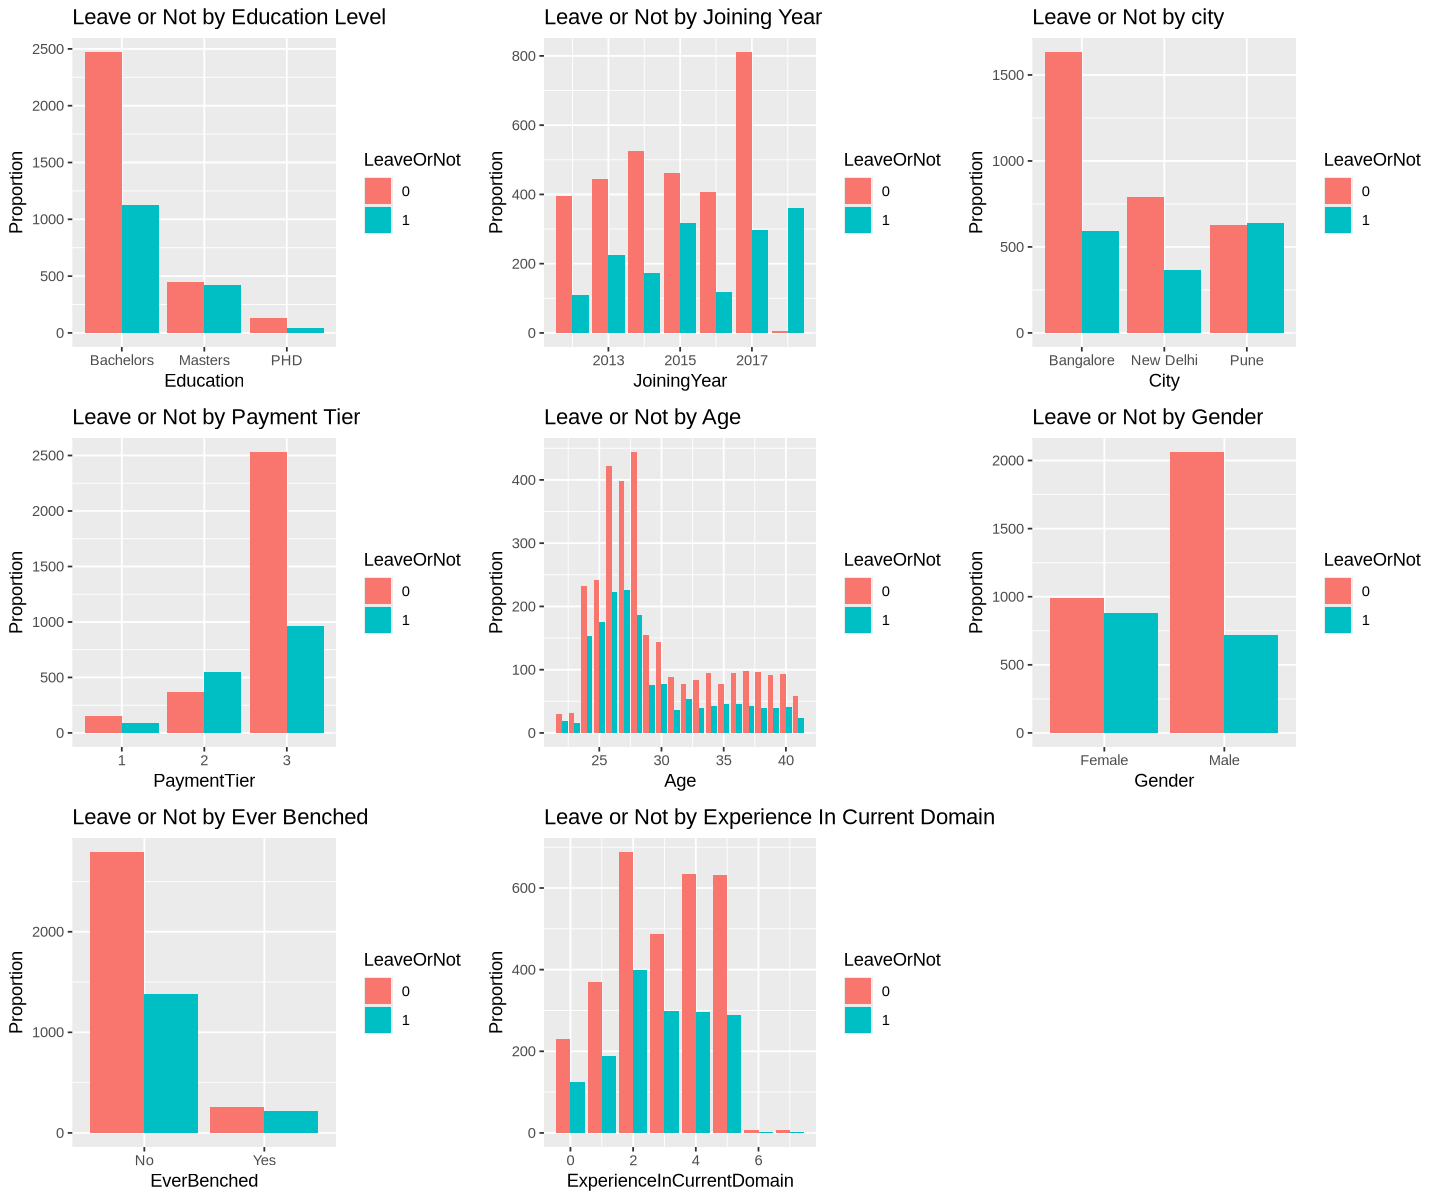

In [5]:
education_barChart <-  
    ggplot(leave, aes(x = Education, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Education Level")

joiningYear_barChart <-  
    ggplot(leave, aes(x = JoiningYear, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Joining Year")

city_barChart <-  
    ggplot(leave, aes(x = City, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by city")

paymentTier_barChart <-  
    ggplot(leave, aes(x = PaymentTier, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Payment Tier")

age_barChart <-  
    ggplot(leave, aes(x = Age, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Age")

gender_barChart <-  
    ggplot(leave, aes(x = Gender, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Gender")

everBenched_barChart <-  
    ggplot(leave, aes(x = EverBenched, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Ever Benched")

experienceInCurrentDomain_barChart <-  
    ggplot(leave, aes(x = ExperienceInCurrentDomain, fill = LeaveOrNot)) +
    geom_bar(position = "dodge") +
    labs(y = "Proportion", title = "Leave or Not by Experience In Current Domain")
# put plot together
options(repr.plot.width = 12, repr.plot.height = 10)
plot_grid(education_barChart, joiningYear_barChart, city_barChart, paymentTier_barChart, age_barChart, gender_barChart, everBenched_barChart, experienceInCurrentDomain_barChart)

- Education Level Plot: Employee education levels may influence their likelihood of leaving. For example:
Higher-educated employees (e.g., those with Master's degrees) may seek better opportunities. Employees with lower education levels may have fewer career options and stay longer. Exploring the relationship between education and leave rates can help organizations tailor retention strategies.

- Joining Year Plot: Joining year can indicate how long employees have been with the company, which may correlate with their likelihood of leaving. Employees who joined recently may be at higher risk of leaving due to poor onboarding experiences or unmet expectations. Patterns based on joining year might reflect broader organizational changes (e.g., mergers, leadership changes, or economic conditions).

- City Plot: Employee turnover can vary by location due to factors such as local job market competition, cost of living, or work culture. Identifying cities with higher leave rates can help organizations focus retention efforts on specific regions.This is particularly relevant for companies operating in multiple cities.

- Payment Tier Plot: Payment tiers likely represent employee salary levels, which are often directly tied to employee satisfaction and retention. Employees in lower payment tiers may leave in search of higher salaries, while those in higher payment tiers might leave due to career stagnation or dissatisfaction unrelated to compensation.

- Age Plot: Age is often correlated with career stage, which can influence leaving decisions: Younger employees might seek rapid career growth. Older employees may seek stability or leave due to retirement. Understanding the age distribution of employees who leave can guide retention strategies for different career stages.

- Gender Plot: Gender-based trends in leave rates can reveal workplace equity issues or unique challenges faced by men or women. For example: Women may leave due to a lack of work-life balance or unequal growth opportunities. Men may leave for higher-paying roles or dissatisfaction with career growth.

- EverBenched Plot: Employees who were benched (not actively working on projects) may feel disengaged, undervalued, or uncertain about their job security, which could lead to higher turnover rates. Understanding the correlation between being benched and leaving can help organizations improve resource management and communication with employees.

- Experience in Current Domain: Employees with less experience in their current domain may leave due to skill mismatches or feeling underqualified. Conversely, highly experienced employees may leave for better opportunities or due to a lack of challenges in their current role. Exploring this variable helps organizations understand how domain experience influences retention.


These plots are relevant because they give a visual overview of potential relationships between each variable and LeaveOrNot. Such trends are crucial for identifying patterns and developing hypotheses about factors influencing employee turnover.

## Methods & Results

To address the research question, we will construct logistic regression models with various regularization (with a $\lambda$ selected by cross validation, using AUC as a measure) and variable selection methods. Then the performance will be assessed on test data with appropriate classification metrics (ROC, accuracy, and a confusion matrix) to select the best-performing model. The performance of the best logistic regression model will then be compared to two simple methods (50/50 random guessing and predicting the most common class) to determine whether there is improvement in performance. 

Using linear models allows the model's performance to be compared to the two "baseline" techniques, while still being relatively simple. Additionally, linear regression's simplicity makes it easier to explain the predictions (directly related mathematically to the coefficients) compared to more complex models, where we might not be able to easily say why the model predicted that someone would leave. This might be important in the context of making employment decisions. Logistic regression in particular is suitable here as we are predicting `LeaveOrNot`, a binary variable.  

This model assumes that the relationship between the log-odds of the response are linear to the explanatory variables, that there is no hetereoscedacity, and that the data is independent. Also, with ordinary least-squares logistic regression, multicollinearity between the explanatory variables could be a concern, which will be addressed by looking at the VIF values for the coefficients.

One potential issue is that there might not be a linear relationship between the log-odds of the target (`LeaveOrNot`) and the chosen subset of explanatory variables. If this is the case, the model may not yield good results even if other, more complex models (like K-nearest neighbours, random forests, gradient boosted trees etc.) capable of capturing non-linear relationships could. Additionally, there are some issues with the dataset itself. Since the collection year is unknown, we cannot use the years employees have been with the company in the analysis, only the year they joined.  Finally, this binary classification model only predicts whether an employee will leave at this point in time (within a span of about a year). In practical applications an employer might be more interested in how long the employee will stay before leaving (survival analysis).

The results of four different logistic regression models can be found [here](https://github.com/HaoyuYou/Stat-301-Project/blob/70f7249a25466f6479347d6137cb9671bcdf1c4b/model_comparison.ipynb). (For brevity, only the analysis for the best performing model is included in this notebook). The results are summarized in the following table:

| Model Name   | Accuracy |  AUC |  
|---|---|---|
| LASSO Selection   | 0.7306590   |   |
| LASSO Model | 0.7156160  |   |
| Forward Selection |  0.7342407 |   |
| Ridge (default threshold) | 0.7320917 | |
| Ridge (best threshold) | 0.7392550 | |
| Stepwise selection | 	0.7328080 | |

Below, the code for the best logistic regression model out of these 6 (Ridge regression with best threshold) is provided.

#### Data Splitting

In [6]:
set.seed(123)
employee_dat <- read_csv("https://raw.githubusercontent.com/jtan29/stat-301-project/main/Employee.csv")
employee_dat <- employee_dat %>%
mutate(PaymentTier = as.factor(PaymentTier))
head(employee_dat)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


In [7]:
employee_dat$id <- 1:nrow(employee_dat) # add a new ID column

# 70% into train split
employee_train <- 
    employee_dat %>% 
    slice_sample(prop = 0.7)

# 30% into test split
employee_test <- 
    employee_dat %>% 
    anti_join(employee_train, by = "id") 

# drop the ID column
employee_train <- 
    employee_train %>% 
    select(-id)

employee_test <-
    employee_test %>%
    select(-id)

head(employee_train, 5)
head(employee_test, 5)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2015,Pune,3,28,Male,No,1,0
Bachelors,2014,Bangalore,3,29,Male,No,1,0
Masters,2017,New Delhi,3,26,Male,No,4,1
Bachelors,2015,Bangalore,3,25,Male,No,3,0
Masters,2017,New Delhi,2,31,Male,No,4,0


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Bachelors,2016,Bangalore,3,22,Male,No,0,0
Bachelors,2016,Bangalore,3,34,Female,No,2,1
Masters,2017,New Delhi,2,37,Male,No,2,0
Bachelors,2016,Bangalore,3,39,Male,No,2,0


#### Cross-Validation

First, we prepare the matrices required for the `cv.glmnet` function that we will be using to perform cross-validation.

In [8]:
model_matrix_X_train <- 
    model.matrix(LeaveOrNot ~ ., employee_train)
model_matrix_X_train <- model_matrix_X_train[,-1]

matrix_Y_train <- 
    as.matrix(employee_train %>% select(LeaveOrNot), ncol = 1)

model_matrix_X_test <- 
    model.matrix(LeaveOrNot ~ ., employee_test)
model_matrix_X_test <- model_matrix_X_test[,-1]

matrix_Y_test <- 
    as.matrix(employee_test %>% select(LeaveOrNot), ncol = 1)

With the matrices prepared, we use cross-validation to find the best value of $\lambda$ to maximize the performance of our model (measured by AUC).

In [9]:
employee_cv_lambda_ridge <- 
  cv.glmnet(
       x = model_matrix_X_train, 
       y = matrix_Y_train,
       alpha = 0,
       family = "binomial",
       type.measure = "auc",
       nfolds = 10)

employee_cv_lambda_ridge


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 10, alpha = 0, family = "binomial") 

Measure: AUC 

    Lambda Index Measure      SE Nonzero
min   0.01   100  0.7313 0.01035      11
1se 110.51     2  0.7225 0.01163      11

Let's also take a quick look at the coefficients of this model.

In [10]:
employee_ridge_max_AUC <- 
  glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 0,
  family = "binomial",
  lambda = employee_cv_lambda_ridge$lambda.min
)

coef(employee_ridge_max_AUC)

12 x 1 sparse Matrix of class "dgCMatrix"
                                     s0
(Intercept)               -361.80222684
EducationMasters             0.59466898
EducationPHD                 0.08283041
JoiningYear                  0.17993174
CityNew Delhi               -0.46870155
CityPune                     0.50088821
PaymentTier2                 0.49153196
PaymentTier3                -0.24690636
Age                         -0.03249241
GenderMale                  -0.79555833
EverBenchedYes               0.54868707
ExperienceInCurrentDomain   -0.06389274

Since Ridge regularization does not shrink coefficients to zero, this didn't perform variable selection. However, some of the coefficients are very close to zero.

#### Performance Assessment

With the model trained, we can look at the predictions and assess the performance on training data.

In [11]:
employee_class <- 
  predict(employee_ridge_max_AUC, model_matrix_X_train, type = "response") %>% round(0)
head(employee_class, 5)

,s0
1,0
2,0
3,0
4,0
5,0


In [12]:
employee_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(employee_class),
    reference = as.factor(employee_train$LeaveOrNot),
    positive = "1"
)

employee_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1934  691
         1  212  420
                                         
               Accuracy : 0.7228         
                 95% CI : (0.707, 0.7381)
    No Information Rate : 0.6589         
    P-Value [Acc > NIR] : 3.106e-15      
                                         
                  Kappa : 0.3117         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.3780         
            Specificity : 0.9012         
         Pos Pred Value : 0.6646         
         Neg Pred Value : 0.7368         
             Prevalence : 0.3411         
         Detection Rate : 0.1290         
   Detection Prevalence : 0.1940         
      Balanced Accuracy : 0.6396         
                                         
       'Positive' Class : 1              
                                         

Using R's `roc` function, we can find the best threshold to use for our model (rather than the default).

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)

ROC_ridge <- roc(
  response = employee_train$LeaveOrNot,
  predictor = predict(employee_ridge_max_AUC, newx = model_matrix_X_train)[,"s0"])

best_threshold <- coords(ROC_ridge, "best")["threshold"] %>% pull()
best_threshold

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] -0.3924

In [14]:
train_pred <- as.integer(predict(employee_ridge_max_AUC, newx = model_matrix_X_train, newy = matrix_Y_train) > best_threshold)

employee_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(train_pred),
    reference = as.factor(employee_train$LeaveOrNot),
    positive = "1"
)
employee_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1761  495
         1  385  616
                                         
               Accuracy : 0.7298         
                 95% CI : (0.7142, 0.745)
    No Information Rate : 0.6589         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3842         
                                         
 Mcnemar's Test P-Value : 0.0002384      
                                         
            Sensitivity : 0.5545         
            Specificity : 0.8206         
         Pos Pred Value : 0.6154         
         Neg Pred Value : 0.7806         
             Prevalence : 0.3411         
         Detection Rate : 0.1891         
   Detection Prevalence : 0.3073         
      Balanced Accuracy : 0.6875         
                                         
       'Positive' Class : 1              
                                         

On the training data, we observe a small improvement -- but the primary effect is better balancing between the two types of errors, whereas without the adjusted threshold there was a tendency to make Type II errors. Next, we'll look at the performance on test data.

In [15]:
test_pred <- as.integer(predict(employee_ridge_max_AUC, newx = model_matrix_X_test, newy = matrix_Y_test) > best_threshold)

employee_confusion_matrix_adj <- 
    confusionMatrix(
    data = as.factor(test_pred),
    reference = as.factor(employee_test$LeaveOrNot),
    positive = "1"
)
employee_confusion_matrix_adj

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 760 217
         1 147 272
                                          
               Accuracy : 0.7393          
                 95% CI : (0.7154, 0.7621)
    No Information Rate : 0.6497          
    P-Value [Acc > NIR] : 4.381e-13       
                                          
                  Kappa : 0.4076          
                                          
 Mcnemar's Test P-Value : 0.0002985       
                                          
            Sensitivity : 0.5562          
            Specificity : 0.8379          
         Pos Pred Value : 0.6492          
         Neg Pred Value : 0.7779          
             Prevalence : 0.3503          
         Detection Rate : 0.1948          
   Detection Prevalence : 0.3001          
      Balanced Accuracy : 0.6971          
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



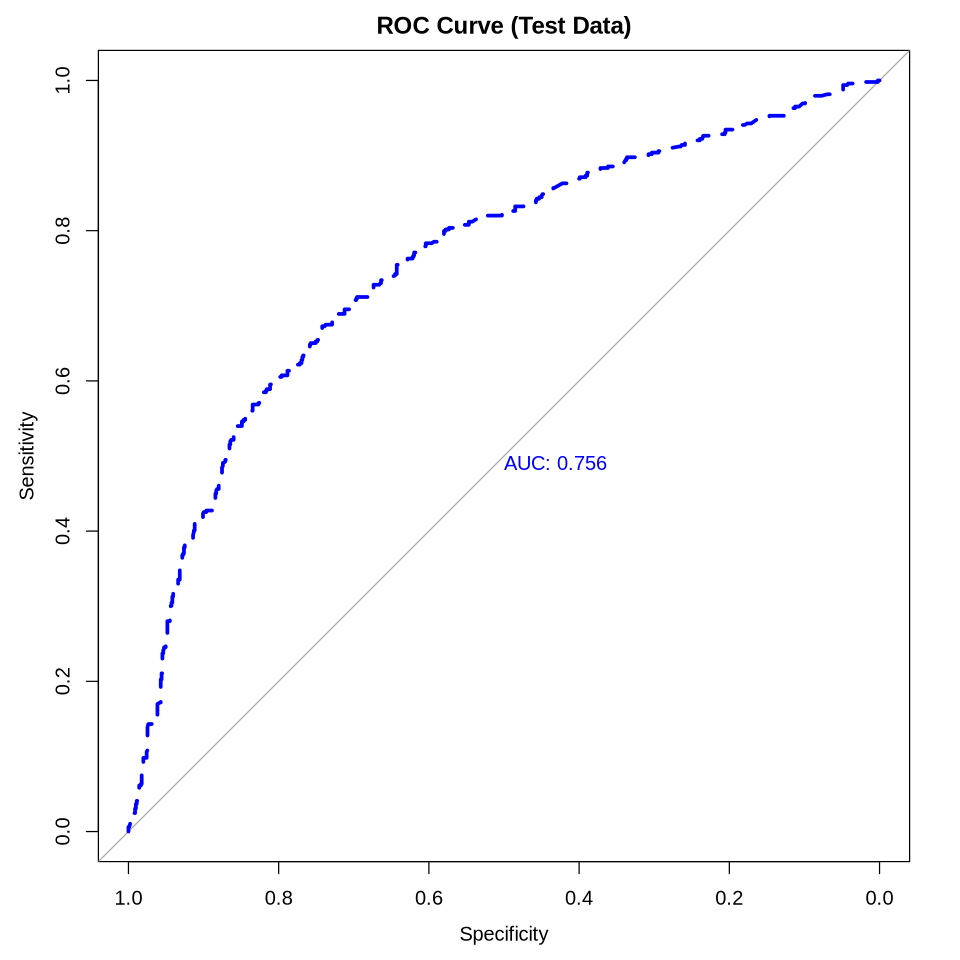

In [16]:
ROC_ridge <- roc(
  response = employee_test$LeaveOrNot,
  predictor = predict(employee_ridge_max_AUC,
                      newx = model_matrix_X_test )[,"s0"] )

plot(ROC_ridge,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve (Test Data)"
)

<br><br>

## Discussion

<br><br>

## References

(August 10, 2023 Thursday). These are the top 4 reasons why employees quit their jobs. CE Noticias Financieras English.

Batt, R., & Colvin, A. J. S. (2011). An Employment Systems Approach To Turnover: Human Resources Practices, Quits, Dismissals, And Performance. The Academy of Management Journal, 54(4), 695–717. 

Adnan Iqbal. (2001). Employee Turnover: Causes, Consequences and Retention Strategies in the Saudi Organizations. The Business Review Journal, 275–281. 